# 01. Importing Libraries

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
%matplotlib inline

# 02. Importing Data

In [20]:
path = r'C:\Users\Rebecca\Library Funding and Literacy Rates'

In [21]:
path

'C:\\Users\\Rebecca\\Library Funding and Literacy Rates'

In [22]:
df_public_libraries = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'public_libraries_prepared.csv'), index_col = False, encoding='latin1')

# 03. Data Cleaning

In [23]:
df_public_libraries.columns

Index(['Unnamed: 0', 'STABR', 'FSCSKEY', 'LIBID', 'LIBNAME', 'ADDRESS', 'CITY',
       'ZIP', 'ZIP4', 'ADDRES_M',
       ...
       'GEOSCORE', 'GEOMTYPE', 'C19CLOSE', 'C19PUBSV', 'C19ECRD2', 'C19REFER',
       'C19OUTSD', 'C19XWIF2', 'C19XWIF3', 'C19STOTH'],
      dtype='object', length=193)

In [24]:
df_public_libraries.head(10)

,Unnamed: 0,STABR,FSCSKEY,LIBID,LIBNAME,ADDRESS,CITY,ZIP,ZIP4,ADDRES_M,...,GEOSCORE,GEOMTYPE,C19CLOSE,C19PUBSV,C19ECRD2,C19REFER,C19OUTSD,C19XWIF2,C19XWIF3,C19STOTH
0,0,AK,AK0001,AK0001-002,ANCHOR POINT PUBLIC LIBRARY,34020 NORTH FORK ROAD,ANCHOR POINT,99556,9150,P.O. BOX 129,...,100.00,POINTADDRESS,M,M,M,N,M,M,M,M
1,1,AK,AK0002,AK0002-011,ANCHORAGE PUBLIC LIBRARY,3600 DENALI STREET,ANCHORAGE,99503,6055,3600 DENALI STREET,...,100.00,POINTADDRESS,N,Y,N,Y,N,N,Y,N
2,2,AK,AK0003,AK0003-002,ANDERSON COMMUNITY LIBRARY,101 FIRST STREET,ANDERSON,99744,M,P.O. BOX 3078,...,99.62,STREETADDRESS,Y,Y,Y,Y,N,Y,N,Y
3,3,AK,AK0006,AK0006-002,KUSKOKWIM CONSORTIUM LIBRARY,420 CHIEF EDDIE HOFFMAN HIGHWAY,BETHEL,99559,M,P.O. BOX 368,...,100.00,MANUAL,N,N,N,N,N,N,N,N
4,4,AK,AK0007,AK0007-002,BIG LAKE PUBLIC LIBRARY,3140 SOUTH BIG LAKE ROAD,WASILLA,99623,9663,P.O. BOX 520829,...,99.58,POINTADDRESS,Y,Y,Y,Y,Y,N,N,N
5,5,AK,AK0008,AK0008-002,CANTWELL COMMUNITY LIBRARY,1 SCHOOL ROAD,CANTWELL,99729,M,P.O. BOX 68,...,100.00,MANUAL,N,Y,N,Y,Y,Y,Y,N
6,6,AK,AK0011,AK0011-002,CHINIAK PUBLIC LIBRARY,43318 SPRUCE WAY,CHINIAK,99615,M,P.O. BOX 5610,...,99.90,STREETADDRESS,N,N,N,N,N,N,N,N
7,7,AK,AK0014,AK0014-002,COLD BAY PUBLIC LIBRARY,10 BARANOV ROAD,COLD BAY,99571,M,P.O. BOX 87,...,100.00,MANUAL,Y,Y,N,Y,Y,N,N,N
8,8,AK,AK0015,AK0015-002,COOPER LANDING COMMUNITY LIBRARY,18511 BEAN CREEK ROAD,COOPER LANDING,99572,M,P.O. BOX 517,...,100.00,POINTADDRESS,N,N,N,N,N,Y,Y,N
9,9,AK,AK0016,AK0016-002,CORDOVA PUBLIC LIBRARY,601 FIRST STREET,CORDOVA,99574,M,P.O. BOX 1210,...,100.00,MANUAL,N,N,N,N,N,N,N,N


In [25]:
df_public_libraries.shape

(9248, 193)

In [26]:
# Check for missing values

df_public_libraries.isnull().sum()

Unnamed: 0    0
STABR         0
FSCSKEY       0
LIBID         0
LIBNAME       0
             ..
C19REFER      0
C19OUTSD      0
C19XWIF2      0
C19XWIF3      0
C19STOTH      0
Length: 193, dtype: int64

In [27]:
# Check for duplicates

dups = df_public_libraries.duplicated()

In [28]:
dups.shape

(9248,)

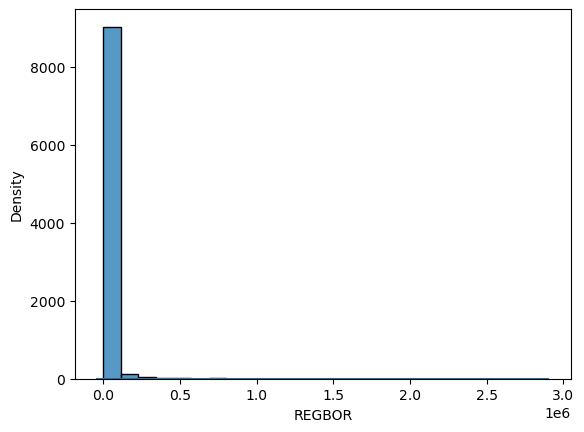

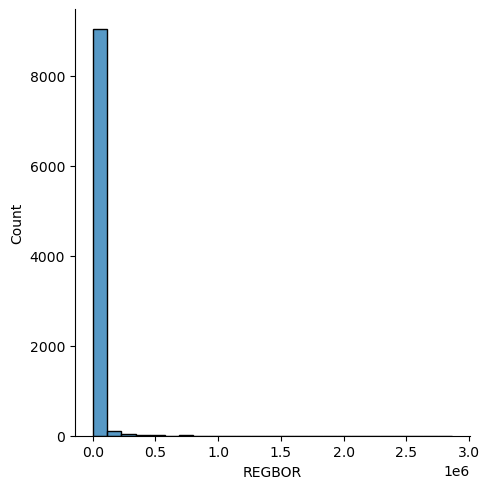

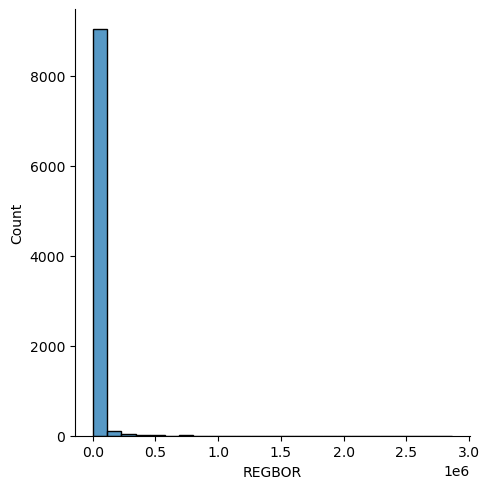

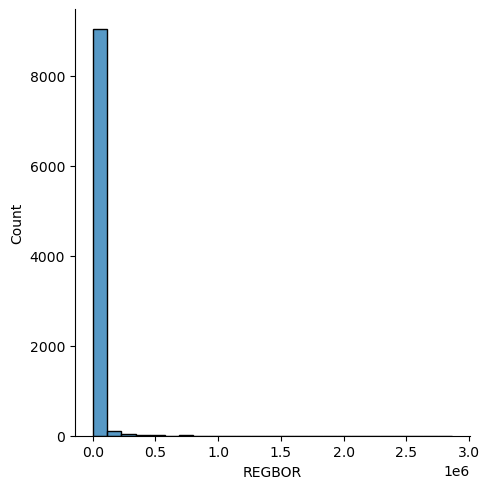

In [30]:
# Extreme values check 

sns.displot(df_public_libraries['REGBOR'], bins=25)
plt.show()

#### There are some extreme values, with some even lower than 0 which isn't possible - you can't have negative registered users. 

In [31]:
# Check the mean

df_public_libraries['REGBOR'].mean()

16996.310121107268

In [32]:
# Check the median

df_public_libraries['REGBOR'].median()

3004.5

In [33]:
# Check the max

df_public_libraries['REGBOR'].max()

2863691

In [34]:
# Check the min

df_public_libraries['REGBOR'].min()

-3

# 04. Data Prep for Regression Analysis

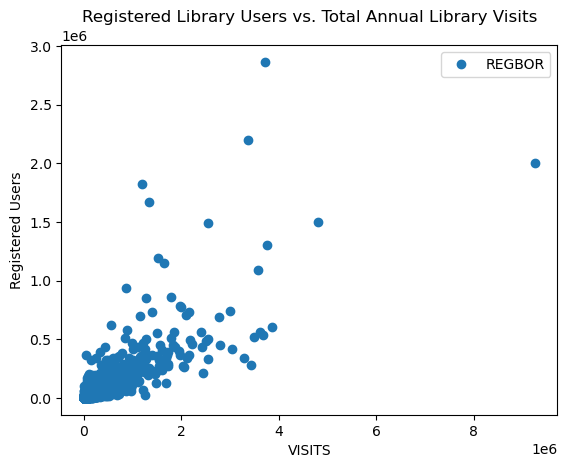

In [36]:
# Creating Scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_public_libraries.plot(x = 'VISITS', y='REGBOR',style='o')
plt.title('Registered Library Users vs. Total Annual Library Visits')  
plt.xlabel('VISITS')  
plt.ylabel('Registered Users')  
plt.show()

#### Hypothesis: Fewer registered users means fewers annual visits to the library.

In [37]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_public_libraries['VISITS'].values.reshape(-1,1)
y = df_public_libraries['REGBOR'].values.reshape(-1,1)

In [38]:
X

array([[  5127],
       [261807],
       [   421],
       ...,
       [ 71067],
       [ 44650],
       [ 25230]], dtype=int64)

In [39]:
y

array([[  1950],
       [123846],
       [   138],
       ...,
       [ 11107],
       [  6850],
       [  5056]], dtype=int64)

In [40]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 05. Regression Analysis

In [41]:
# Create a regression object.

regression = LinearRegression()

In [42]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [43]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

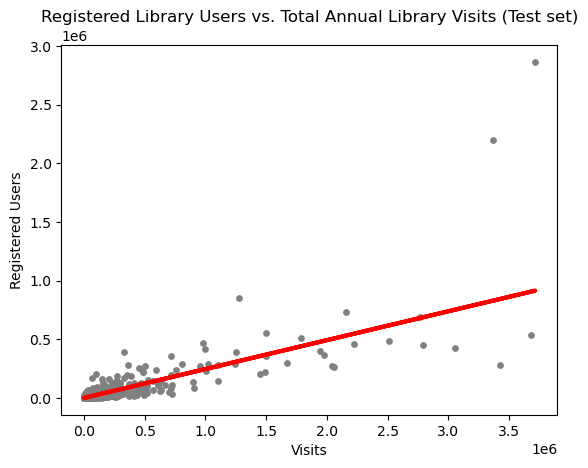

In [44]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Registered Library Users vs. Total Annual Library Visits (Test set)')
plot_test.xlabel('Visits')
plot_test.ylabel('Registered Users')
plot_test.show()

#### This line trends in a slight upward motion, which may suggest that the more registered users at the library, the more visits the library will see annually. I do think it's important to note that while this is a positive line, it's an overly-aggressive positive line. 

In [45]:
# Checking model performance statistics 

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [46]:
# Print the model summary statistics to evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.24633999]]
Mean squared error:  2820506513.8902698
R2 score:  0.6008708220012811


#### Thoughts on model summary: 
    Slope is flatter than the ideal.
    MSE is very large, which may suggest this model is not doing well. 
    R2 score (0.6008708220012811) is roughly 60%, which isn't awful and can be classified as "moderately predictive." 

In [47]:
y_predicted

array([[  682.63087777],
       [ -490.68649579],
       [22238.8580646 ],
       ...,
       [ -130.04475007],
       [   44.36396303],
       [ 4569.38324394]])

In [48]:
# Compare the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,612,682.630878
1,893,-490.686496
2,7096,22238.858065
3,39967,74462.689658
4,5552,7581.628645
5,942,217.787316
6,46469,2664.189759
7,1183,-599.815111
8,9577,29635.216272
9,1160,4157.256440


#### Thoughts on model performance:
    Looking at the actual vs predicted values of y, there are some huge differences between the values, which shows the regression model does not fit the data well. There are some negative predictions on positive values as well, showing this is a poor model which also matches with the quantitative metrics. The R2 quantity (0.6008708220012811) shows us that there is a relationship and that visits do explain part of the counts, but not in any meaningful way. 
    Some bias to think about when comparing these two data points are: 
        One person can visit the library often, causing high visits, but low registered users. 
        One library could have many cardholders who rarely visit, causing high registers users, but low visits. 
        City libraries will look differently than rural libraries. 
    While these two data points are related, there is still a lot of information we have yet to uncover and there are multiple factors that made this model ineffective such as population size, libary size, all of the different programming, circulation, etc.
